# [E-14] Recommendation 
## Movielens 영화 추천 실습
### 학습 목표
* 추천 시스템의 개념과 목적을 이해한다.
* Implicit 라이브러리를 활용하여 Matrix Factorization(이하 MF) 기반의 추천 모델을 만들어 본다.
* 음악 감상 기록을 활용하여 비슷한 아티스트를 찾고 아티스트를 추천해 본다.
* 추천 시스템에서 자주 사용되는 데이터 구조인 CSR Matrix을 익힌다
* 유저의 행위 데이터 중 Explicit data와 Implicit data의 차이점을 익힌다.
* 새로운 데이터셋으로 직접 추천 모델을 만들어 본다.


### 목차
#### 1. 들어가며
  1-1. 추천 시스템: 협업 필터링
  1-2. 추천 시스템: 콘텐츠 기반 필터링
  1-3. 협업 필터링을 사용할 수 없게 하는 제약조건
  1-4. 추천 시스템 실제 사례

#### 2. Movielens 영화 추천
  2-1. Movielens 데이터
  2-2. 데이터 탐색하기와 전처리
  2-3. 데이터 탐색
  2-4. 내가 선호하는 영화 데이터 추가
  2-5. CSR matrix를 직접 만들기
  2-6. 모델 구성 및 훈련
  2-7. 내가 선호하는 영화와 모델이 예측한 나의 선호도 파악하기
  2-8. 내가 좋아하는 영화와 비슷한 영화 추천받기
  2-9. 내가 가장 좋아할 만한 영화들 추천받기

#### 3. 회고
  3-1. 정리
  3-2. 루브릭 평가 지표를 맞추기 위해 시도한 것들
  3-3. 앞으로 더 공부할 내용
  3-4. 궁금한 사항
  3-5. 참고사이트


### 루브릭 평가 기준
|평가문항|상세기준|
|:---|:---|
|1. CSR matrix가 정상적으로 만들어졌다.|사용자와 아이템 개수를 바탕으로 정확한 사이즈로 만들었다.|
|2. MF 모델이 정상적으로 훈련되어 그럴듯한 추천이 이루어졌다.|사용자와 아이템 벡터 내적수치가 의미있게 형성되었다.|
|3. 비슷한 영화 찾기와 유저에게 추천하기의 과정이 정상적으로 진행되었다.|MF모델이 예측한 유저 선호도 및 아이템간 유사도, 기여도가 의미있게 측정되었다.|   
<br/>

----



## 1. 들어가며
### 1-1. 추천 시스템: 협업 필터링
* 다수의 사용자의 아이템 구매 이력 정보만으로 사용자간 유사성 및 아이템 간 유사성을 파악
* 아이템과 사용자 간의 행동 또는 관계에만 주목할 뿐 아이템 자체의 고유한 속성에 주목하지 않음

### 1-2. 추천 시스템: 콘텐츠 기반 필터링
* 아이템의 고유의 정보를 바탕으로 아이템 간 유사성을 파악
* 아이템 자체의 속성에만 주목하고 사용자와 아이템 간의 관련성 에는 주목하지 않음

### 1-3. 협업 필터링을 사용할 수 없게 하는 제약조건
* 시스템이 충분한 정보를 모으지 못한 사용자나 아이템에 대한 추론을 할 수 없는 상태인 콜드 스타트(Cold Start) 상황
* 계산량이 너무 많아 추천의 효율이 떨어지는 상황
* 롱테일의 꼬리 부분, 즉 사용자의 관심이 저조한 항목의 정보가 부족하여 추천에서 배제되는 상황

### 1-4. 추천 시스템 실제 사례
* 유튜브 : 동영상이 매일 엄청나게 많이 올라오고 유저의 취향(게임 선호, 뷰티 선호, 지식 선호, 뉴스 선호)이 다양하게 고려됨
* 페이스북 : 포스팅되는 글이 엄청 많고 유저가 관심 있는 페이지, 친구, 그룹은 전부 다름
* 아마존 : 카테고리를 한정해도 판매 품목이 엄청 많고 좋아하는 브랜드, 구매 기준이 다양함

---

## 2. Movielens 영화 추천
### 2-1. Movielens 데이터
* rating.dat 안에 이미 인덱싱까지 완료된 사용자-영화-평점 데이터가 깔끔하게 정리되어 있음
* 유저가 영화에 대해 평점을 매긴 데이터가 데이터 크기 별로 있습니다. MovieLens 1M Dataset 사용을 권장합니다.
* 별점 데이터는 대표적인 explicit 데이터입니다. 하지만 implicit 데이터로 간주하고 테스트해 볼 수 있습니다.
* 별점을 시청횟수로 해석해서 생각하겠습니다.
* 또한 유저가 3점 미만으로 준 데이터는 선호하지 않는다고 가정하고 제외하겠습니다.

### 2-2. 데이터 탐색하기와 전처리

#### 데이터 준비
* tsv(Tab-Separated Values)
* csv(Comma-Separated Values)

#### 필요한 라이브러리 임포트

In [1]:
import pandas as pd
import os

#### 인덱싱 완료된 데이터 가져오기

In [2]:
rating_file_path=os.getenv('HOME') + '/aiffel/Exploration/E_14/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'ratings', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python', encoding = "ISO-8859-1")
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
# 3점 이상만 남깁니다.
ratings = ratings[ratings['ratings']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


In [4]:
# ratings 컬럼의 이름을 counts로 바꿉니다.
ratings.rename(columns={'ratings':'counts'}, inplace=True)

In [5]:
ratings['counts']

0          5
1          3
2          3
3          4
4          5
          ..
1000203    3
1000205    5
1000206    5
1000207    4
1000208    4
Name: counts, Length: 836478, dtype: int64

In [6]:
# 영화 제목을 보기 위해 메타 데이터를 읽어옵니다.
movie_file_path=os.getenv('HOME') + '/aiffel/Exploration/E_14/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python', encoding='ISO-8859-1')
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


#### ratings 데이터와 movies 데이터 합치기

In [7]:
ratings = ratings.join(movies.set_index('movie_id'), on='movie_id')
ratings.head()

,user_id,movie_id,counts,timestamp,title,genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


#### 문자열 소문자로 바꿔주기

In [8]:
# 검색을 쉽게 하기 위해 title, genre 문자열을 소문자로 바꿔주기
ratings['title'] = ratings['title'].str.lower() 
ratings['genre'] = ratings['genre'].str.lower() 
ratings.head(10)

,user_id,movie_id,counts,timestamp,title,genre
0,1,1193,5,978300760,one flew over the cuckoo's nest (1975),drama
1,1,661,3,978302109,james and the giant peach (1996),animation|children's|musical
2,1,914,3,978301968,my fair lady (1964),musical|romance
3,1,3408,4,978300275,erin brockovich (2000),drama
4,1,2355,5,978824291,"bug's life, a (1998)",animation|children's|comedy
5,1,1197,3,978302268,"princess bride, the (1987)",action|adventure|comedy|romance
6,1,1287,5,978302039,ben-hur (1959),action|adventure|drama
7,1,2804,5,978300719,"christmas story, a (1983)",comedy|drama
8,1,594,4,978302268,snow white and the seven dwarfs (1937),animation|children's|musical
9,1,919,4,978301368,"wizard of oz, the (1939)",adventure|children's|drama|musical


### 2-3. 데이터 탐색
* pandas.DataFrame.nunique( ) 함수 사용하기
---
#### ratings 에 있는 유니크한 영화 개수

In [9]:
# 유저 수
ratings['user_id'].nunique()

6039

#### ratings 에 있는 유니크한 사용자 수

In [10]:
# 영화 수
ratings['movie_id'].nunique()

3628

#### 가장 인기 있는 영화 30개 (인기순)

In [11]:
# 인기 많은 영화
movie_count = ratings.groupby('title')['user_id'].count()
movie_count.sort_values(ascending=False).head(30)

title
american beauty (1999)                                   3211
star wars: episode iv - a new hope (1977)                2910
star wars: episode v - the empire strikes back (1980)    2885
star wars: episode vi - return of the jedi (1983)        2716
saving private ryan (1998)                               2561
terminator 2: judgment day (1991)                        2509
silence of the lambs, the (1991)                         2498
raiders of the lost ark (1981)                           2473
back to the future (1985)                                2460
matrix, the (1999)                                       2434
jurassic park (1993)                                     2413
sixth sense, the (1999)                                  2385
fargo (1996)                                             2371
braveheart (1995)                                        2314
men in black (1997)                                      2297
schindler's list (1993)                                  2257
pr

In [12]:
# 유저별 몇 개의 영화를 봤는지에 대한 통계
user_count = ratings.groupby('user_id')['title'].count()
user_count.describe()

count    6039.000000
mean      138.512668
std       156.241599
min         1.000000
25%        38.000000
50%        81.000000
75%       177.000000
max      1968.000000
Name: title, dtype: float64

### 2-4. 내가 선호하는 영화 데이터 추가

#### 내가 선호하는 영화 데이터 검색하기

In [13]:
movies[movies['title'].str.lower().str.contains('when harry', regex=False)]

,movie_id,title,genre
1287,1307,When Harry Met Sally... (1989),Comedy|Romance


In [14]:
movies[movies['title'].str.lower().str.contains('forrest', regex=False)]

,movie_id,title,genre
352,356,Forrest Gump (1994),Comedy|Romance|War


In [15]:
movies[movies['title'].str.lower().str.contains('singin', regex=False)]

,movie_id,title,genre
887,899,Singin' in the Rain (1952),Musical|Romance


In [16]:
movies[movies['title'].str.lower().str.contains('lion king', regex=False)]

,movie_id,title,genre
360,364,"Lion King, The (1994)",Animation|Children's|Musical


In [17]:
movies[movies['title'].str.lower().str.contains('dead poets', regex=False)]

,movie_id,title,genre
1226,1246,Dead Poets Society (1989),Drama


#### 내가 좋아하는 영화 리스트 만들기
* 영화 다섯편 movie_id 로 영화 제목 가져오기
* 리스트에 있는 영화는 모두 7번씩 본걸로 count 입력

In [18]:
my_movie_ids = [1307, 356, 899 , 364, 1246]

my_movie_titles = []
for i in my_movie_ids:
    my_movie_titles.extend(list(movies[movies['movie_id'] == i]['title']))

    
my_movie_genres = []
for i in my_movie_ids:
    my_movie_genres.extend(list(movies[movies['movie_id'] == i]['genre']))
    
my_movie_list = pd.DataFrame({'user_id': ['sujin']*5, 'movie_id': my_movie_ids, 'counts': [5]*5, 'title': my_movie_titles, 'genre': my_movie_genres})
my_movie_list

,user_id,movie_id,counts,title,genre
0,sujin,1307,5,When Harry Met Sally... (1989),Comedy|Romance
1,sujin,356,5,Forrest Gump (1994),Comedy|Romance|War
2,sujin,899,5,Singin' in the Rain (1952),Musical|Romance
3,sujin,364,5,"Lion King, The (1994)",Animation|Children's|Musical
4,sujin,1246,5,Dead Poets Society (1989),Drama


#### ratings 데이터에 내 영화 리스트 데이터 추가

In [19]:
if not ratings.isin({'user_id':['sujin']})['user_id'].any():
    ratings = ratings.append(my_movie_list, ignore_index=True)

ratings.tail(10)

,user_id,movie_id,counts,timestamp,title,genre
836473,6040,1090,3,956715518.0,platoon (1986),drama|war
836474,6040,1094,5,956704887.0,"crying game, the (1992)",drama|romance|war
836475,6040,562,5,956704746.0,welcome to the dollhouse (1995),comedy|drama
836476,6040,1096,4,956715648.0,sophie's choice (1982),drama
836477,6040,1097,4,956715569.0,e.t. the extra-terrestrial (1982),children's|drama|fantasy|sci-fi
836478,sujin,1307,5,NaN,When Harry Met Sally... (1989),Comedy|Romance
836479,sujin,356,5,NaN,Forrest Gump (1994),Comedy|Romance|War
836480,sujin,899,5,NaN,Singin' in the Rain (1952),Musical|Romance
836481,sujin,364,5,NaN,"Lion King, The (1994)",Animation|Children's|Musical
836482,sujin,1246,5,NaN,Dead Poets Society (1989),Drama


#### 새롭게 추가된 행의 데이터를 소문자로 변경

In [20]:
# 검색을 쉽게 하기 위해 title, genre 문자열을 소문자로 바꿔주기
ratings['title'] = ratings['title'].str.lower() 
ratings['genre'] = ratings['genre'].str.lower() 
ratings.tail(10)

,user_id,movie_id,counts,timestamp,title,genre
836473,6040,1090,3,956715518.0,platoon (1986),drama|war
836474,6040,1094,5,956704887.0,"crying game, the (1992)",drama|romance|war
836475,6040,562,5,956704746.0,welcome to the dollhouse (1995),comedy|drama
836476,6040,1096,4,956715648.0,sophie's choice (1982),drama
836477,6040,1097,4,956715569.0,e.t. the extra-terrestrial (1982),children's|drama|fantasy|sci-fi
836478,sujin,1307,5,NaN,when harry met sally... (1989),comedy|romance
836479,sujin,356,5,NaN,forrest gump (1994),comedy|romance|war
836480,sujin,899,5,NaN,singin' in the rain (1952),musical|romance
836481,sujin,364,5,NaN,"lion king, the (1994)",animation|children's|musical
836482,sujin,1246,5,NaN,dead poets society (1989),drama


#### timestamp 삭제

In [21]:
ratings = ratings.drop(columns=['timestamp'])
ratings.head()

,user_id,movie_id,counts,title,genre
0,1,1193,5,one flew over the cuckoo's nest (1975),drama
1,1,661,3,james and the giant peach (1996),animation|children's|musical
2,1,914,3,my fair lady (1964),musical|romance
3,1,3408,4,erin brockovich (2000),drama
4,1,2355,5,"bug's life, a (1998)",animation|children's|comedy


#### 모델에 활용하기 위한 전처리
* 고유한 유저, 타이틀 찾아내기
* 인덱싱

In [22]:
# 고유한 user_id, title 를 찾아내는 코드
user_unique = ratings['user_id'].unique()
title_unique = ratings['title'].unique()

# user_id, title indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
title_to_idx = {v:k for k,v in enumerate(title_unique)}

In [23]:
# 인덱싱이 잘 되었는지 확인해 봅니다. 
print(user_to_idx['sujin'])    # 6039명 유저 중 마지막으로 추가된 유저이니 6049가 나와야 합니다. 
print(title_to_idx['platoon (1986)'])

6039
1030


In [24]:
movies[movies['title'].str.lower().str.contains('dead poets', regex=False)]

,movie_id,title,genre
1226,1246,Dead Poets Society (1989),Drama


#### indexing을 통해 데이터 컬럼 내 값을 바꾸기

In [25]:
temp_user_data = ratings['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(ratings):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    ratings['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# title_to_id을 통해 title 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_title_data = ratings['title'].map(title_to_idx.get).dropna()
if len(temp_title_data) == len(ratings):
    print('title column indexing OK!!')
    ratings['title'] = temp_title_data
else:
    print('title column indexing Fail!!')

ratings

user_id column indexing OK!!
title column indexing OK!!


,user_id,movie_id,counts,title,genre
0,0,1193,5,0,drama
1,0,661,3,1,animation|children's|musical
2,0,914,3,2,musical|romance
3,0,3408,4,3,drama
4,0,2355,5,4,animation|children's|comedy
...,...,...,...,...,...
836478,6039,1307,5,488,comedy|romance
836479,6039,356,5,160,comedy|romance|war
836480,6039,899,5,663,musical|romance
836481,6039,364,5,330,animation|children's|musical


### 2-5. CSR matrix를 직접 만들기

In [26]:
from scipy.sparse import csr_matrix

num_user = ratings['user_id'].nunique()
num_title = ratings['title'].nunique()

csr_data = csr_matrix((ratings['counts'], (ratings.user_id, ratings.title)), \
                      shape= (num_user, num_title))
csr_data

<6040x3628 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Row format>

### 2-6. 모델 구성 및 훈련
#### als_model = AlternatingLeastSquares 

**implicit 패키지**
* 이전 스텝에서 설명한 암묵적(implicit) dataset을 사용하는 다양한 모델을 굉장히 빠르게 학습할 수 있는 패키지
* als(AlternatingLeastSquares) 모델 사용

In [27]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

#### Implicit AlternatingLeastSquares 모델의 선언

In [28]:
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, \
                                    use_gpu=False, iterations=15, dtype=np.float32)

#### als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)

In [29]:
csr_data_transpose = csr_data.T
csr_data_transpose

<3628x6040 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Column format>

#### 모델 훈련

In [30]:
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

### 2-7. 내가 선호하는 영화와 모델이 예측한 나의 선호도 파악하기
* als_model로 나의 user_id 에 대한 벡터값과 내가 선호하는 영화 하나의 벡터값을 구함

In [31]:
sujin, my_movie = user_to_idx['sujin'], title_to_idx['when harry met sally... (1989)']

sujin_vector, my_movie_vector = als_model.user_factors[sujin], als_model.item_factors[my_movie]

#### 내가 추가한 user_id 에 대한 벡터값

In [32]:
sujin_vector

array([ 0.8251405 ,  0.46955287,  0.36111087,  0.09991691,  0.15723826,
       -0.37325752, -0.24033351,  0.19637708,  0.5654243 ,  0.11669152,
       -0.22393268,  0.2861097 ,  0.3628199 ,  0.0804755 , -0.55674255,
        0.11785267,  0.7416949 ,  0.33980185,  0.13661066,  0.5370762 ,
        0.44344065, -0.35128385,  0.01123109,  0.18562925, -0.00636485,
       -0.6313576 , -0.82751346,  0.6292778 , -0.40038633,  0.42583603,
       -0.05530057, -0.56316096,  0.26997918, -0.04081307, -0.00795465,
       -0.02180731, -0.50280696,  0.01724443, -0.7984164 ,  0.4990532 ,
       -0.3118203 , -0.72883   , -0.53862286, -0.79626304, -0.34077802,
        0.16089728, -0.58158493, -0.23555662,  0.9462713 ,  0.6102569 ,
        0.3637643 ,  0.74420327, -0.01956639, -0.43830648, -1.0331966 ,
       -0.19613448, -0.45273733, -0.02678437,  0.72033715,  1.1814938 ,
        1.2033359 ,  0.7230725 ,  0.3254806 ,  0.19961862, -0.1727671 ,
        1.0725648 ,  0.32235876, -0.0655791 , -0.58133614, -0.13

#### 내가 고른 lion king 영화에 대한 벡터값

In [33]:
my_movie_vector

array([ 1.80833731e-02,  3.66739817e-02,  9.45263077e-03,  1.21318304e-03,
        2.02072170e-02, -9.32944100e-03,  7.88549334e-03,  7.07600825e-03,
        2.09142268e-02,  2.58409306e-02,  1.00387409e-02,  8.45654344e-04,
        1.82663351e-02,  8.73703510e-03, -6.06634282e-03,  3.32788415e-02,
       -1.29529019e-03,  3.23377028e-02,  1.46568241e-02,  9.33262613e-03,
        9.90954787e-03, -1.20978482e-04, -1.29438797e-03,  4.09637083e-04,
       -1.25633152e-02, -1.23421531e-02, -4.22365079e-03,  2.88564283e-02,
        1.84484925e-02,  1.34715829e-02,  6.60650479e-03,  1.78752141e-03,
       -8.82650726e-03,  4.96198516e-03, -5.15647093e-03, -1.78756956e-02,
       -3.25546525e-02, -7.69163162e-05, -1.52285630e-02,  1.04226377e-02,
        1.86584517e-02,  7.43168406e-03,  1.29042706e-03, -1.89570393e-02,
        1.40981860e-02, -1.29184583e-02, -1.56967565e-02, -2.15446185e-02,
        3.90166901e-02,  1.98483076e-02,  2.60365400e-02,  1.44793512e-03,
        1.02913508e-03,  

#### 내가 추가한 user_id와 line_king 을 내적하는 코드

In [34]:
np.dot(sujin_vector, my_movie_vector)

0.4043378

#### 선호 리스트에 없는 영화의 벡터 계산 후 내적

In [35]:
just_movie = title_to_idx['my fair lady (1964)']
just_movie_vector = als_model.item_factors[just_movie]
np.dot(sujin_vector, just_movie_vector)

0.27523875

### 2-8. 내가 좋아하는 영화와 비슷한 영화 추천받기

#### 비슷한 영화 추천
* AlternatingLeastSquares 클래스에 구현되어 있는 similar_items 메서드를 통하여 비슷한 영화 찾기
* 내가 좋아하는 영화 'When Harry Met Sally... (1989)' 와 비슷한 영화를 총 15개를 출력

In [36]:
favorite_movie = 'when harry met sally... (1989)'
movie_id = title_to_idx[favorite_movie]
similar_title = als_model.similar_items(movie_id, N=15)
similar_title

[(488, 1.0000001),
 (13, 0.67119753),
 (169, 0.6309477),
 (1144, 0.5606389),
 (1155, 0.52821684),
 (22, 0.5214781),
 (961, 0.51682836),
 (163, 0.49447665),
 (369, 0.47219118),
 (110, 0.46070057),
 (19, 0.456683),
 (1067, 0.45022833),
 (786, 0.44433382),
 (325, 0.44417548),
 (365, 0.44300896)]

#### title_to_idx 를 뒤집어, index로부터 title 이름을 얻는 dict를 생성
* index 로 출력되어있던 영화 title 값을 실제 제목으로 가져오기

In [37]:
idx_to_title = {v:k for k,v in title_to_idx.items()}
[idx_to_title[i[0]] for i in similar_title]

['when harry met sally... (1989)',
 "ferris bueller's day off (1986)",
 'fish called wanda, a (1988)',
 'bull durham (1988)',
 'risky business (1983)',
 'back to the future (1985)',
 'say anything... (1989)',
 'raising arizona (1987)',
 'witness (1985)',
 'groundhog day (1993)',
 'big (1988)',
 'fast times at ridgemont high (1982)',
 'broadcast news (1987)',
 'romancing the stone (1984)',
 'splash (1984)']

#### 내가 좋아하는 영화와 비슷한 영화 추천해주는 함수

In [38]:
def get_similar_movie(movie_title: str):
    movie_id = title_to_idx[movie_title]
    similar_title = als_model.similar_items(movie_id, N=15)
    similar_title = [idx_to_title[i[0]] for i in similar_title]
    return similar_title

In [39]:
get_similar_movie('lion king, the (1994)')

['lion king, the (1994)',
 'beauty and the beast (1991)',
 'aladdin (1992)',
 'hunchback of notre dame, the (1996)',
 'mulan (1998)',
 'tarzan (1999)',
 'little mermaid, the (1989)',
 'hercules (1997)',
 'anastasia (1997)',
 'pocahontas (1995)',
 'snow white and the seven dwarfs (1937)',
 'antz (1998)',
 'cinderella (1950)',
 'dumbo (1941)',
 'sleeping beauty (1959)']

In [40]:
get_similar_movie('singin\' in the rain (1952)')

["singin' in the rain (1952)",
 'west side story (1961)',
 'my fair lady (1964)',
 'american in paris, an (1951)',
 'king and i, the (1956)',
 'meet me in st. louis (1944)',
 'south pacific (1958)',
 'white christmas (1954)',
 'gigi (1958)',
 'top hat (1935)',
 'holiday inn (1942)',
 'guys and dolls (1955)',
 'oliver! (1968)',
 'funny face (1957)',
 'cabaret (1972)']

### 2-9. 내가 가장 좋아할 만한 영화들 추천받기
#### 내가 추가한 user_id, 내가 선호하는 영화를 가지고 비슷한 영화 20개의 index 출력

In [41]:
user = user_to_idx['sujin']

# recommend에서는 user*item CSR Matrix를 받습니다.
movie_recommended = als_model.recommend(user, csr_data, N=20, \
                                        filter_already_liked_items=True)
movie_recommended

[(33, 0.37402624),
 (10, 0.34304792),
 (110, 0.30339777),
 (191, 0.29909182),
 (354, 0.29891855),
 (2, 0.27523875),
 (360, 0.25253987),
 (13, 0.25031844),
 (22, 0.24296871),
 (361, 0.23586641),
 (26, 0.2083835),
 (40, 0.20567304),
 (369, 0.20464611),
 (384, 0.19474758),
 (703, 0.19023761),
 (120, 0.18915276),
 (189, 0.18792228),
 (154, 0.18690465),
 (20, 0.18340902),
 (757, 0.17990893)]

#### index 를 이용해서 내가 좋아할만한 영화 제목 출력하기

In [42]:
[idx_to_title[i[0]] for i in movie_recommended]

['aladdin (1992)',
 'beauty and the beast (1991)',
 'groundhog day (1993)',
 'little mermaid, the (1989)',
 'west side story (1961)',
 'my fair lady (1964)',
 'dirty dancing (1987)',
 "ferris bueller's day off (1986)",
 'back to the future (1985)',
 'casablanca (1942)',
 'e.t. the extra-terrestrial (1982)',
 'toy story (1995)',
 'witness (1985)',
 'jerry maguire (1996)',
 'annie hall (1977)',
 'raiders of the lost ark (1981)',
 'breakfast club, the (1985)',
 'as good as it gets (1997)',
 'pleasantville (1998)',
 'full monty, the (1997)']

#### 내가 입력한 리스트에 있는 영화의 기여도
* AlternatingLeastSquares 클래스에 구현된 explain 메서드를 사용하면 제가 기록을 남긴 데이터 중 이 추천에 기여한 정도 확인 가능

In [43]:
recommended = title_to_idx['aladdin (1992)']
explain = als_model.explain(user, csr_data, itemid=recommended)

[(idx_to_title[i[0]], i[1]) for i in explain[1]]

[('lion king, the (1994)', 0.29053343337495197),
 ('forrest gump (1994)', 0.03864105549331662),
 ('dead poets society (1989)', 0.0268140682645115),
 ("singin' in the rain (1952)", 0.020410152162877813),
 ('when harry met sally... (1989)', -0.010317792623731819)]

* 'aladdin (1992)' 영화 추천의 기여도가 가장 높은 영화 : 0.2905의 기여도를 나타낸 **lion king, the (1994)** 

## 3. 회고

### 3-1. 정리
* 노드에서 연습했던 것을 잘 이해했다면 어렵지 않게 진행할 수 있는 노드였다. 난이도가 적절하게 잘 맞아서 스트레스없이 재미있게 몰입할 수 있었다. 
* 기존 노드에서 연습했던 것과의 차이는 기존 노드는 모든 정보가 담겨있는 파일 하나(usersha1-artmbid-artname-plays.tsv)만 가지고 왔다면 이번 노드는 영화 정보가 담긴 movies.dat 파일과 rating 정보가 담겨있는 ratings.dat 파일 두 개를 가지고와서 join 이라는 메서드를 이용해서 합쳐서 진행했다.
* unique 한 값을 확인하고, 전처리하고, 새로운 데이터를 추가하는 과정이 수월했다. 
* 모델에 활용하기 위해 indexing 하는 과정도 재미있었다. 여기서 휴먼에러가 있어서 title 이 제대로 인덱싱 되지 않았는데, 문제점을 찾고 나니 뿌듯했다. 
* als_model 을 이용해서 비슷한 영화를 추천받고, 내가 입력해넣은 데이터가 추천받은 데이터에 얼마나 기여했는지를 알아보는 과정은 굉장히 신기했다. 

* 추천 시스템, 많은 분들이 이야기했던 것처럼 재미있었다. 😊



### 3-2. 루브릭 평가 지표를 맞추기 위해 시도한 것들
#### 1. CSR matrix가 정상적으로 만들어졌다.
* 836483 rows × 5 columns 아이템 개수랑 정확하게 맞게 CSR matrix 가 생성되었다.
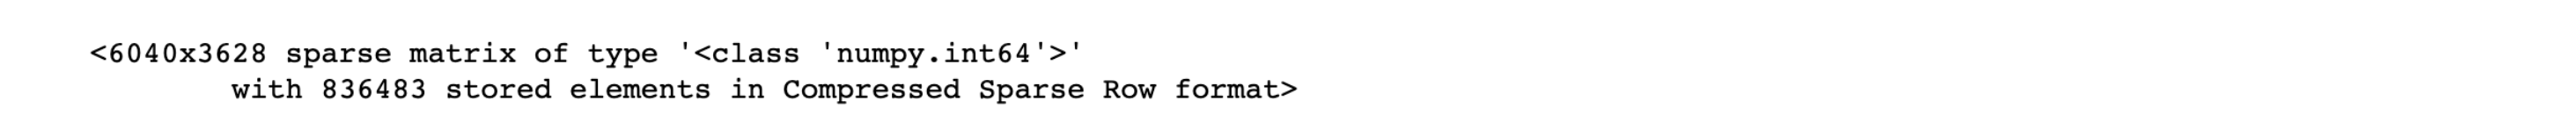


#### 2. MF 모델이 정상적으로 훈련되어 그럴듯한 추천이 이루어졌다.
* 내적수치가 너무 낮게 나와서 디테일하게 확인을 해보았더니, title 이 제대로 indexing 되지 않았었고, 소문자 처리 이후에 새로운 데이터를 추가했기 때문이었다. 데이터 추가한 후에 다시 소문자 처리를 해주어 indexing 을 제대로 했더니 내적수치도 의미있게 형성되었다.
  * 제대로 indexing 되지 않는 title
    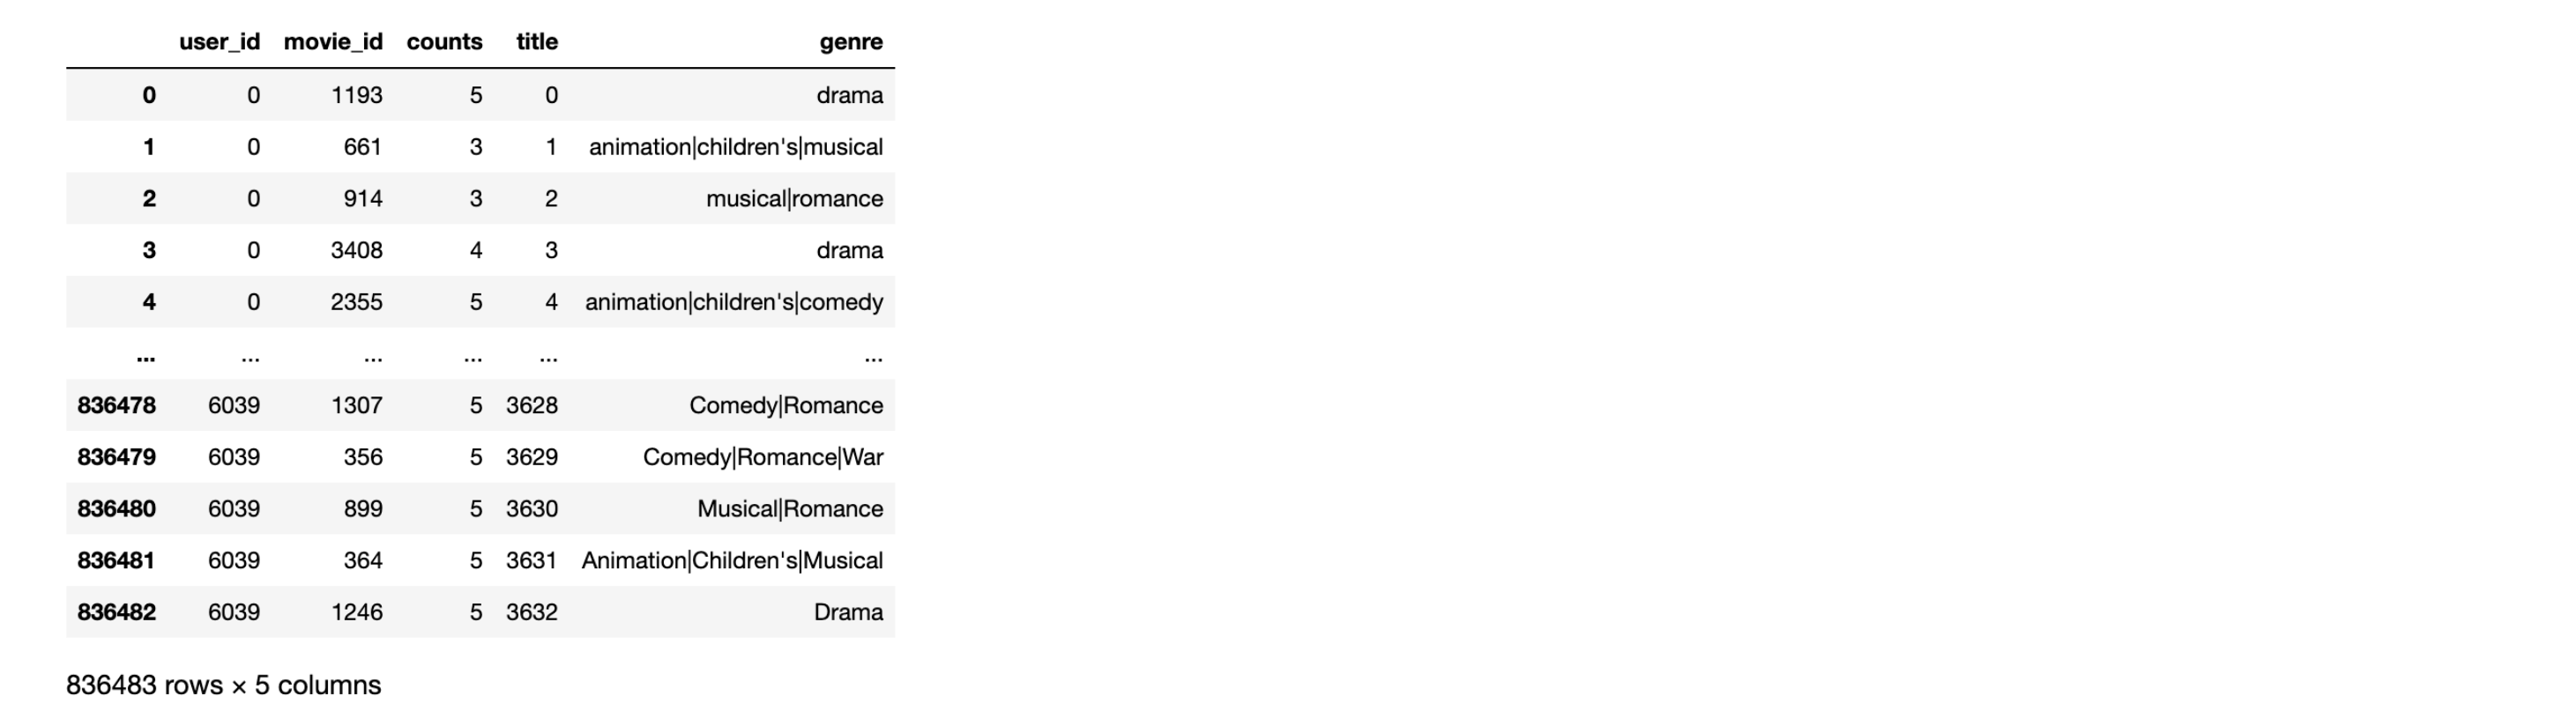

  * 문제를 찾아냄! (새로 추가된 데이터의 영화 제목은 대문자가 섞여있는 것을 확인)
    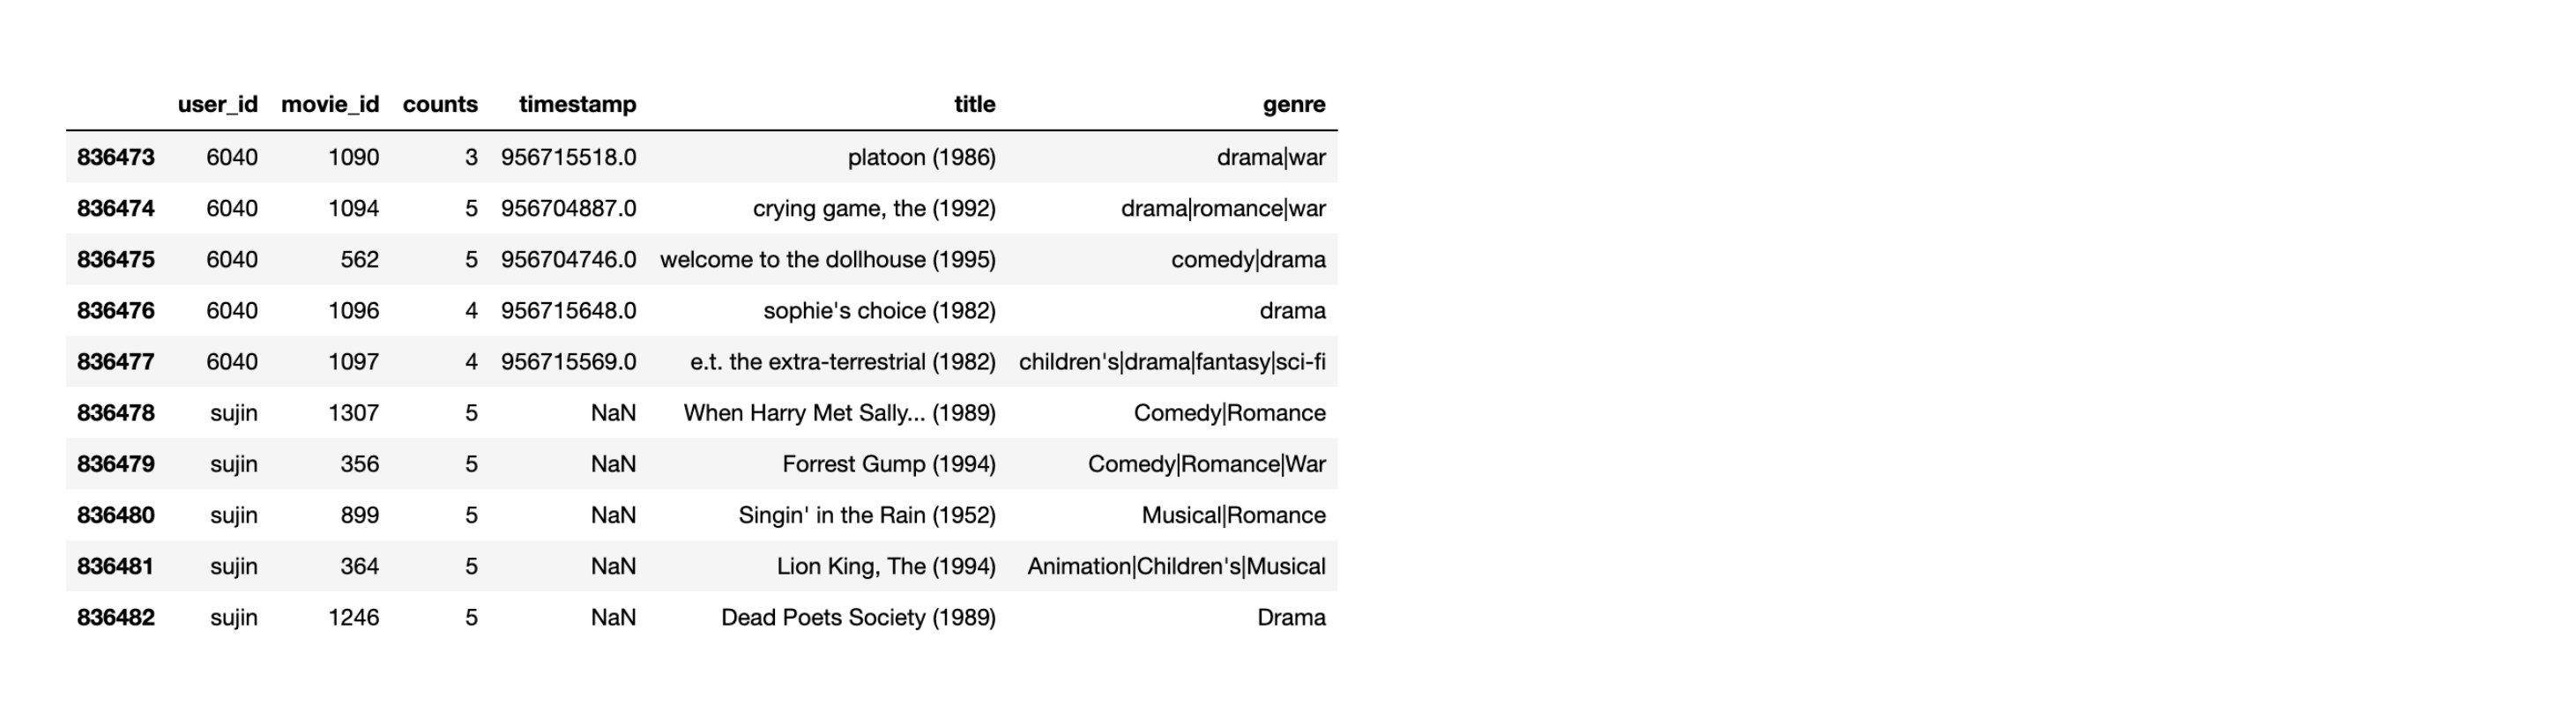
     
#### 3. 비슷한 영화 찾기와 유저에게 추천하기의 과정이 정상적으로 진행되었다.
* 영화 라이언킹과 비슷한 영화로 아래 리스트를 추천받았다.
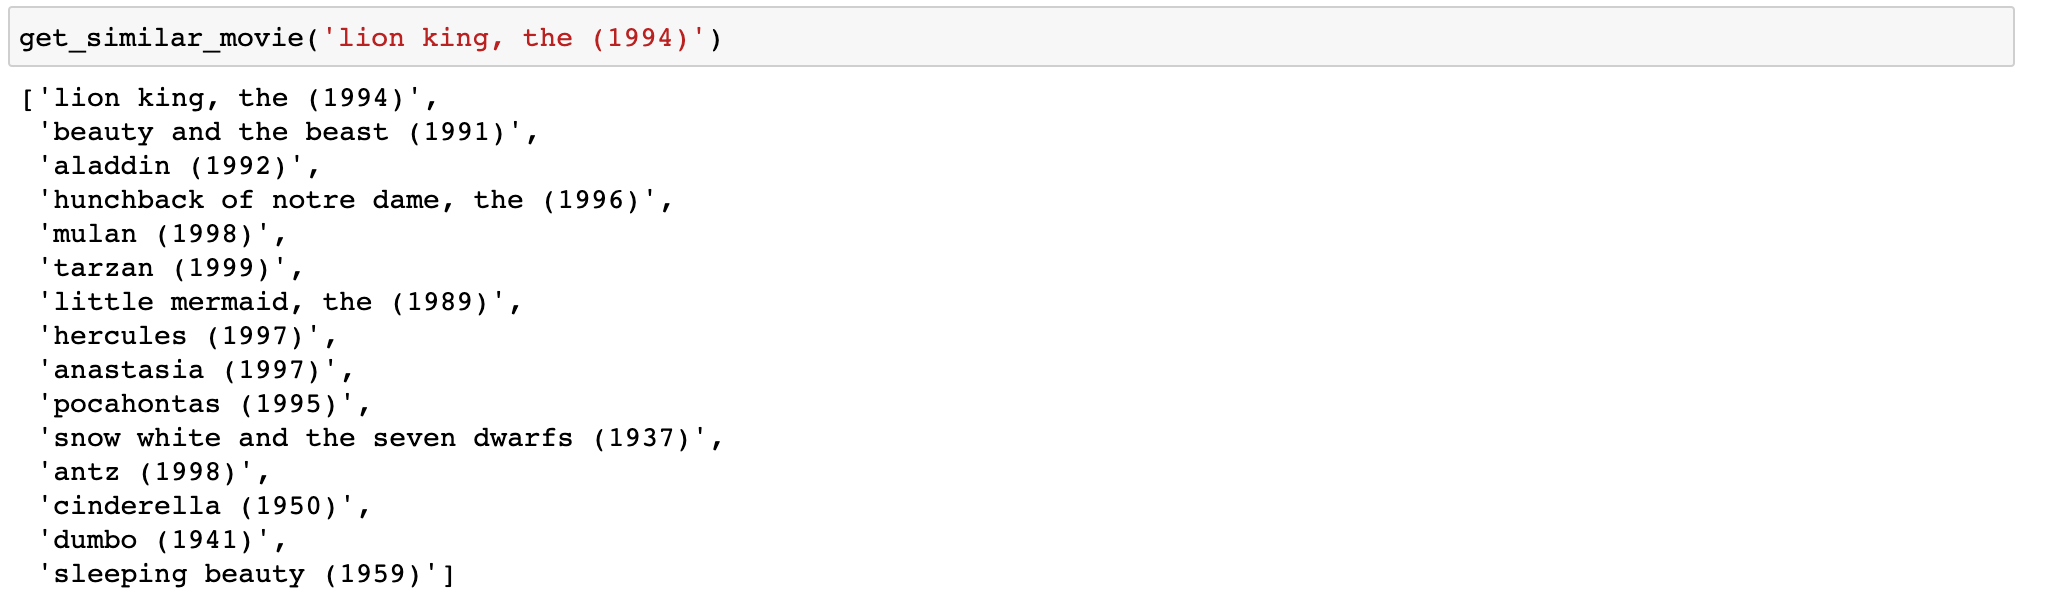


### 3-3. 앞으로 더 공부할 내용
* als_model = AlternatingLeastSquares  
* 데이터 전처리
* 추천 시스템의 실제 적용 사례의 디테일



### 3-4. 궁금한 사항
* 데이터 출력했을 때, title 이 작은 따옴표, 큰 따옴표가 섞여서 출력된다. 모델 훈련 등에는 문제가 없었지만 왜 이렇게 나오는 것인지 궁금하다.
  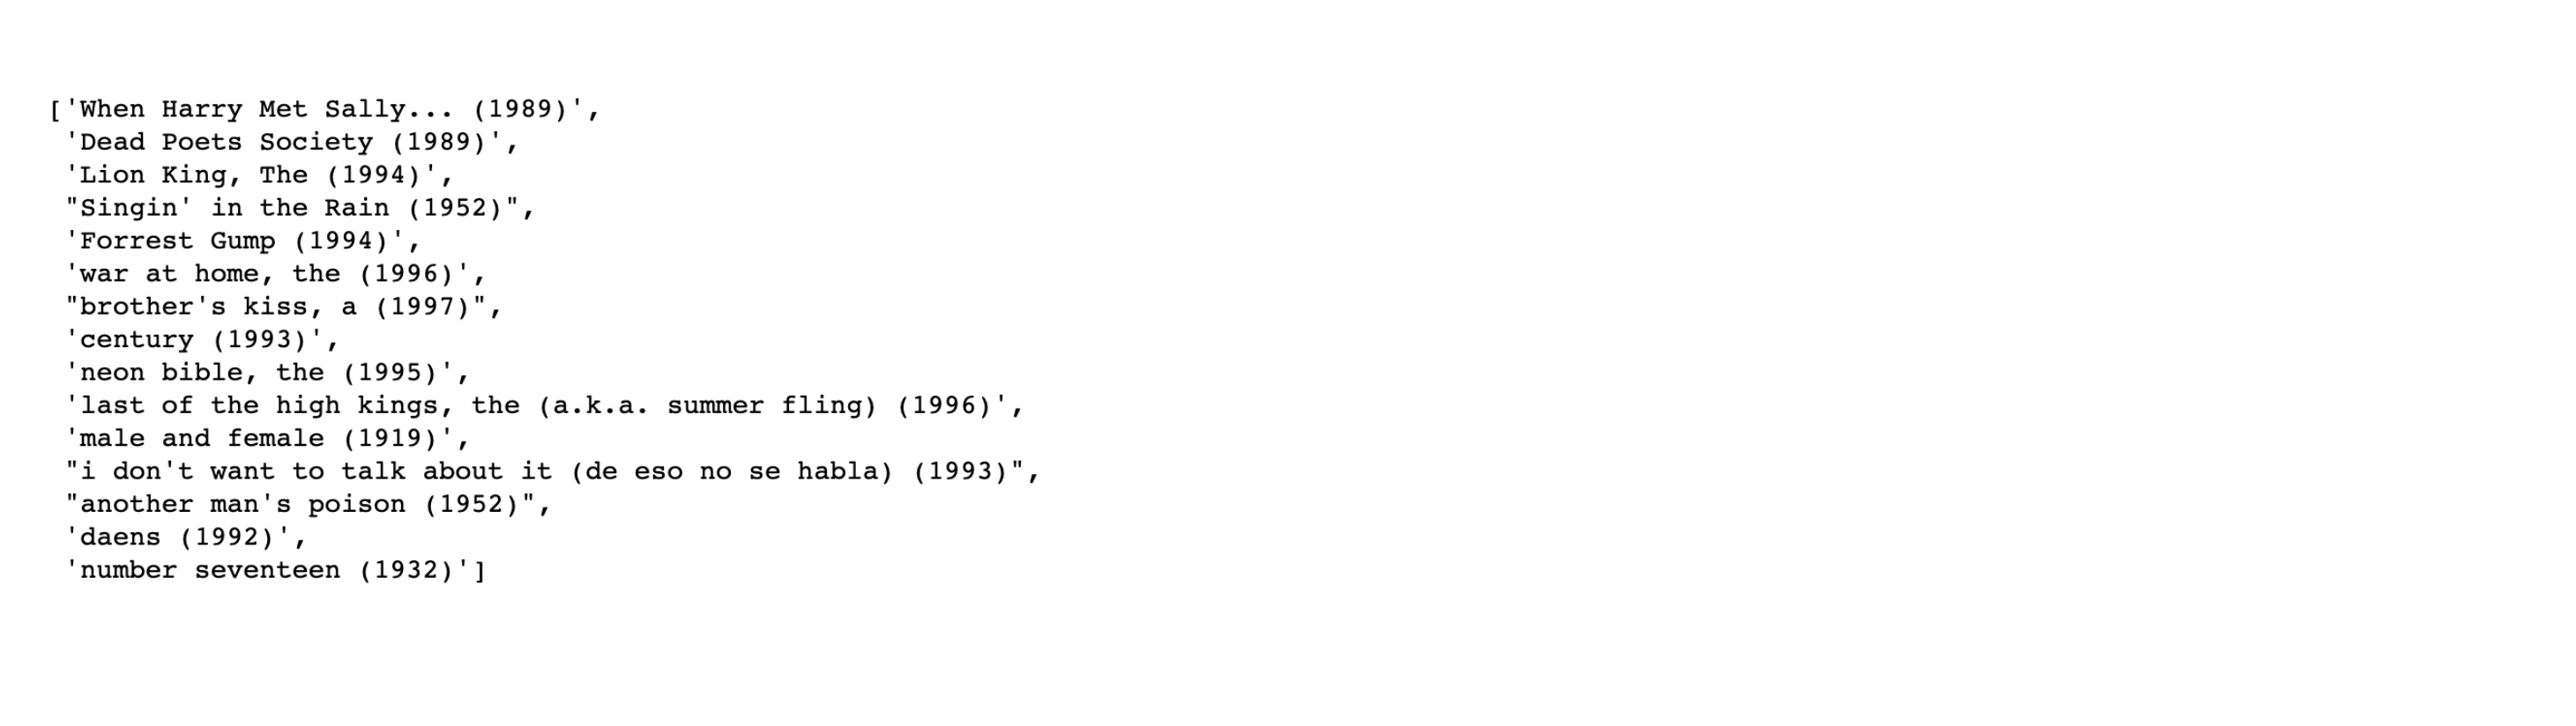



### 3-5. 참고사이트
* 추천 알고리즘(Recommendation Algorithm)이란?   
https://dkswnkk.tistory.com/118?category=518887   

